# Data science I

## pandas

![](https://pandas.pydata.org/_static/pandas_logo.png)

**Python Data Analysis Library**

> pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language ([pandas-website](https://pandas.pydata.org/index.html)).

First-off a typical use case:

In [2]:
import pandas as pd

tabelle = pd.read_csv('../data/metar_frankfurt.csv')
tabelle.head()

,time,vis,temp,dewpt,winddir,windspeed,press_sealevel,cloudlevels,lcl_alt,lcl_cov,ucl_alt,ucl_cov
0,2015-12-01 00:20,10000.0,11.0,8.0,230.0,19.0,1017.0,3.0,2600.0,FEW,14000.0,BKN
1,2015-12-01 00:50,10000.0,11.0,8.0,230.0,19.0,1017.0,2.0,2800.0,SCT,14000.0,BKN
2,2015-12-01 01:20,10000.0,11.0,8.0,230.0,16.0,1018.0,2.0,2800.0,SCT,13000.0,BKN
3,2015-12-01 01:50,10000.0,12.0,8.0,230.0,16.0,1018.0,2.0,2200.0,BKN,13000.0,BKN
4,2015-12-01 02:20,10000.0,12.0,8.0,220.0,14.0,1019.0,3.0,2200.0,FEW,12000.0,BKN


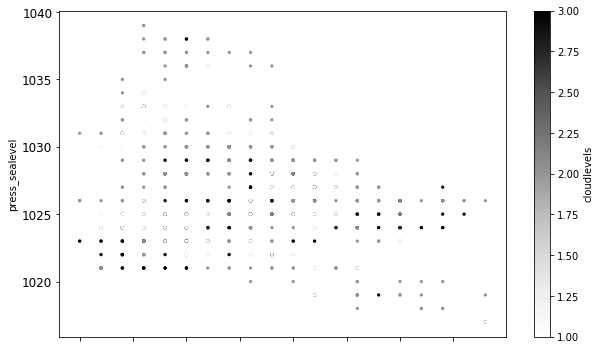

In [35]:
tabelle.plot.scatter(x="windspeed",y="press_sealevel",figsize=(10,6),fontsize=12,c="cloudlevels",marker=".");

## matplotlib

![](https://matplotlib.org/_static/logo2.png)

## Exercise 4

- Complete the fourth assignment and push your results until tuesday 14:00 next week